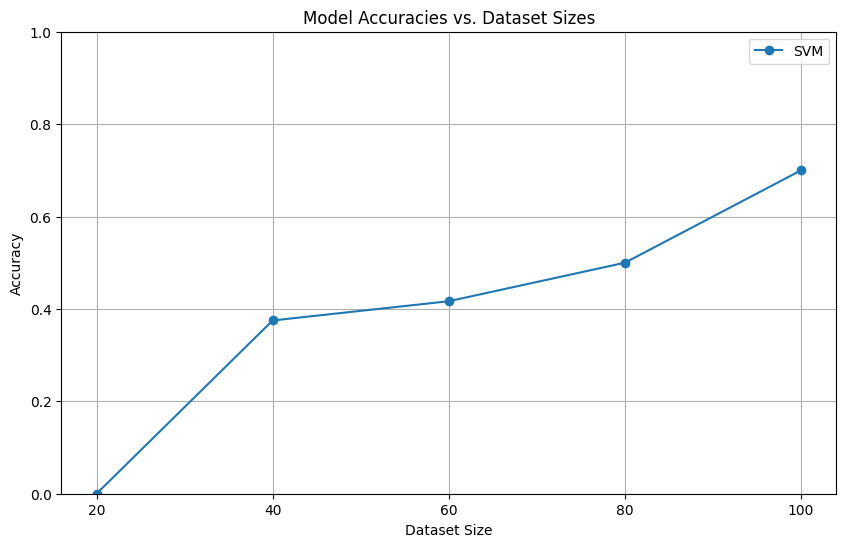

In [2]:
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()  # Mean pooling

# Encode the dataset
X_encoded = get_bert_embeddings(train_emoticon_X)

# Store accuracies for different sizes
accuracies_lr = []
accuracies_svm = []
sizes = [20, 40, 60, 80, 100]

for size in sizes:
    # Limit the dataset to the current size
    X_subset = X_encoded[:size]
    y_subset = train_emoticon_Y[:size]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

    # Logistic Regression
    lr_model = LogisticRegression(max_iter=200)
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_val)
    lr_accuracy = accuracy_score(y_val, lr_predictions)
    accuracies_lr.append(lr_accuracy)

    # SVM
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_val)
    svm_accuracy = accuracy_score(y_val, svm_predictions)
    accuracies_svm.append(svm_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(sizes, accuracies_svm, marker='o', label='SVM')
plt.title('Model Accuracies vs. Dataset Sizes')
plt.xlabel('Dataset Size')
plt.ylabel('Accuracy')
plt.xticks(sizes)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()
